In [1]:
import pandas as pd
import scipy as scp
import scipy.linalg as lalg
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
train = pd.read_table('IrisTrainML.dt', header = None, sep = ' ')
test = pd.read_table('IrisTestML.dt', header = None, sep = ' ')

In [3]:
train.columns = ['feat_1', 'feat_2', 'label']
test.columns = ['feat_1', 'feat_2', 'label']

In [4]:
train = train.loc[train.label != 2, :]
test = test.loc[test.label != 2, :]

In [5]:
def change_label(y) :
    if (y == 0) :
        return -1
    else :
        return y

In [6]:
train['label'] = train['label'].apply(change_label)
test['label'] = test['label'].apply(change_label)

In [7]:
x = train[['feat_1', 'feat_2']].values

In [8]:
y = train['label'].values

In [9]:
def gradient(x, y, w, n) :
    num = x * y[:,scp.newaxis]
    den = scp.dot(x, w) * y
    den = scp.exp(den) + 1
    quotient = num / den[:,scp.newaxis]
    avg = scp.sum(quotient, axis = 0) / n
    return - avg

In [10]:
def terminate(e, error_stop, gnorm, gnorm_stop) :
    if ((gnorm < gnorm_stop) and (e < error_stop )) : return True
    else : return False

In [11]:
def error(x, y, classifier, n) :
    pred = scp.apply_along_axis(classifier, 1, x)
    e = abs((pred - y)) / 2
    e = scp.sum(e) / n
    return e
    

In [12]:
def make_classifier(w) :
    def classifier(x) :
        p = scp.exp(scp.dot(x,w))/(1 + scp.exp(scp.dot(x,w)))
        if (p > 0.5) : return 1
        else : return -1
    return classifier

In [13]:
def log_reg(x, 
            y, 
            rate = 0.1, 
            gnorm_stop = 0.01, 
            error_stop = 0.05, 
            iterations_stop = 1000000, 
            start_weigths = None,
            seed = 1989) :
    
    scp.random.seed(seed)
    if (start_weigths == None) : w = scp.random.normal(size = x.shape[1])
    else : w = start_weights
    
    n = x.shape[0]; ws = []; gnorms = []; es = []; i = 1
    
    while (i <= iterations_stop) : 
    
        ws.append(w)
        g = gradient(x, y, w, n); gnorm = lalg.norm(g); gnorms.append(gnorm)
        c = make_classifier(w); e = error(x,y,c,n); es.append(e)
        
        if terminate(e, error_stop, gnorm, gnorm_stop) : break
        
        w = w + (-g) * rate; i = i + 1
    
    return {'classifier' : c, 
            'weights' : w, 
            'gnorm_history' : scp.array(gnorms), 
            'weight_history' : scp.array(ws), 
            'error_history' : scp.array(es)}

In [14]:
res = log_reg(x, y)

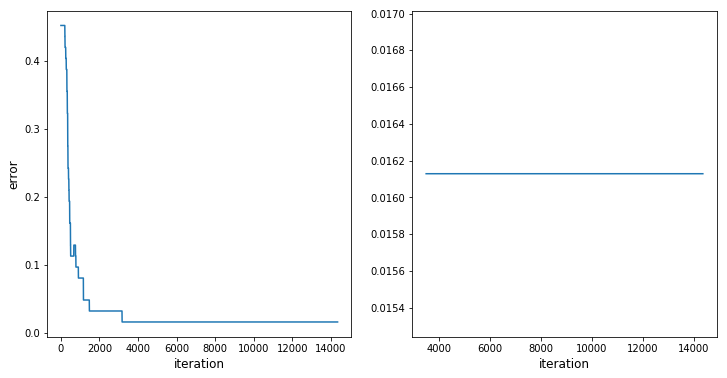

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].plot(res['error_history'])
ax[0].set_xlabel('iteration', fontsize = 'large')
ax[0].set_ylabel('error', fontsize = 'large')
ax[1].plot(scp.arange(3500, len(res['error_history'])), 
                  res['error_history'][3500:])
ax[1].set_xlabel('iteration', fontsize = 'large')
fig.savefig('errorplot.jpg')

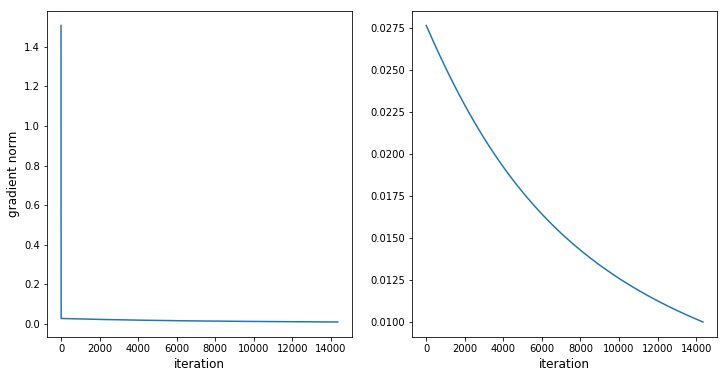

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].plot(res['gnorm_history'])
ax[0].set_xlabel('iteration', fontsize = 'large')
ax[0].set_ylabel('gradient norm', fontsize = 'large')
ax[1].plot(scp.arange(10, len(res['error_history'])),
           res['gnorm_history'][10:])
ax[1].set_xlabel('iteration', fontsize = 'large')
fig.savefig('normplot1.jpg')

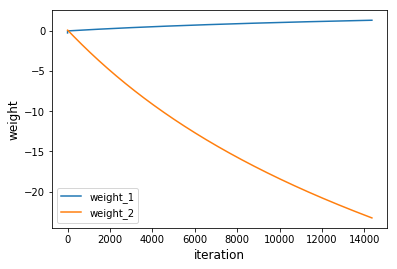

In [19]:
plt.plot(res['weight_history'][:,0], label = 'weight_1')
plt.plot(res['weight_history'][:,1], label = 'weight_2')
plt.xlabel('iteration', fontsize = 'large')
plt.ylabel('weight', fontsize = 'large')
plt.legend()
plt.savefig('weightplot3.jpg')

In [20]:
res['weights']

array([  1.31495233, -23.28359065])

In [21]:
res['error_history']

array([ 0.4516129 ,  0.4516129 ,  0.4516129 , ...,  0.01612903,
        0.01612903,  0.01612903])

In [22]:
x_test = test[['feat_1', 'feat_2']].values

In [23]:
y_test = test['label'].values

In [24]:
error(x_test,y_test,res['classifier'],x_test.shape[0])

0.038461538461538464